In [1]:
install.packages("car")

Installing package into 'C:/Users/minel/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minel\AppData\Local\Temp\RtmponK0D4\downloaded_packages


In [3]:
library('dplyr')
library('rcompanion')
library('car')

In [4]:
YtC <- read.csv("C:/Users/minel/OneDrive/Documents/Entity Coursework/DSO105C (Oct 3 - Oct 23)/Lesson 4/YouTubeChannels.csv")

In [7]:
plotNormalHistogram(YtC$Videos.views)

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in seq.default(min(x), max(x), length = length): 'from' must be a finite number


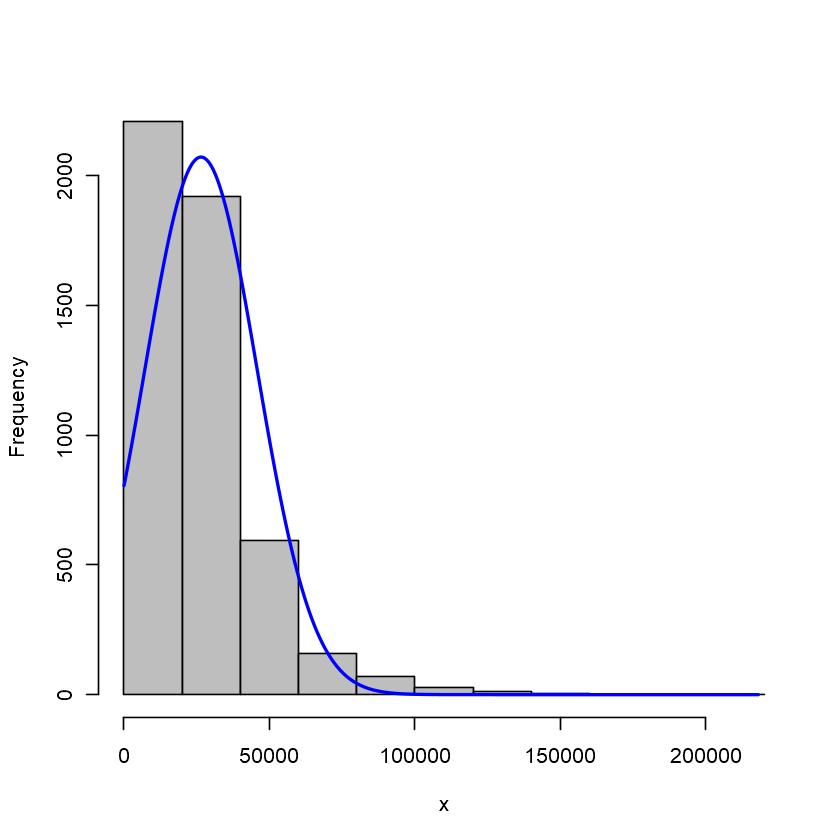

In [8]:
YtC$Video.viewsSQRT <- sqrt(YtC$Video.views)
plotNormalHistogram(YtC$Video.viewsSQRT)

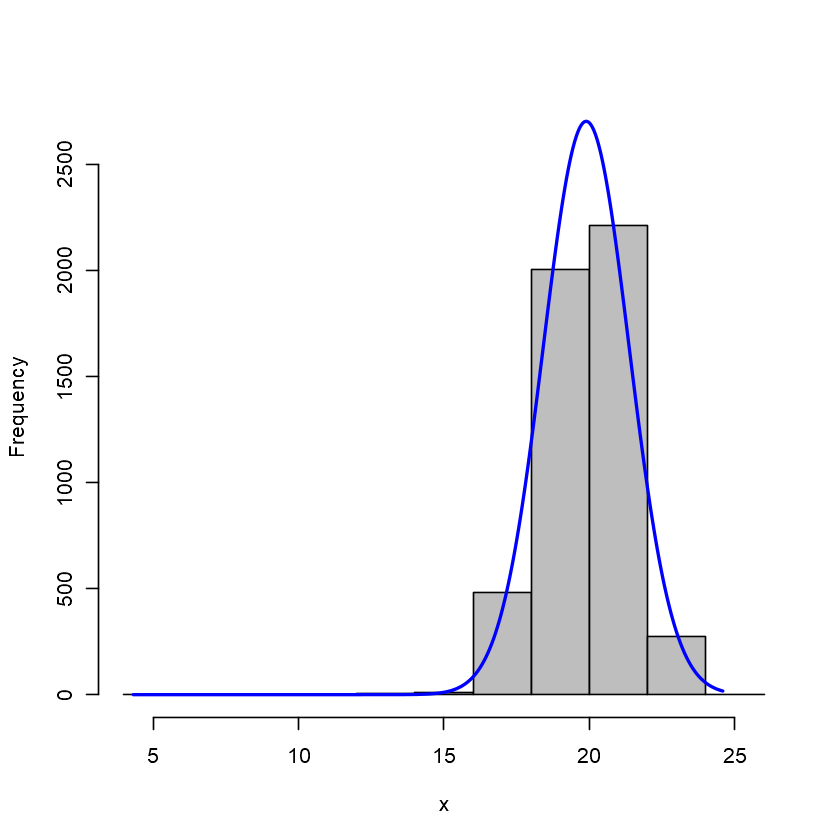

In [9]:
YtC$Video.viewsLOG <- log(YtC$Video.views)
plotNormalHistogram(YtC$Video.viewsLOG)

In [10]:
bartlett.test(Video.viewsSQRT ~ Grade, YtC)


	Bartlett test of homogeneity of variances

data:  Video.viewsSQRT by Grade
Bartlett's K-squared = 1107.1, df = 5, p-value < 2.2e-16


In [14]:
ANOVA1 <- lm(Video.viewsSQRT ~ Date, data=YtC)
Anova(ANOVA1, Type="II", white.adjust=TRUE)


ERROR: Error in eval(predvars, data, env): object 'Date' not found


In [12]:
pairwise.t.test(YtC$Video.viewsSQRT, YtC$Grade, p.adjust="bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  YtC$Video.viewsSQRT and YtC$Grade 

     A-      A       Â       A+      A++    
A    < 2e-16 -       -       -       -      
Â    0.00146 1.7e-05 -       -       -      
A+   2.2e-09 1.9e-05 8.9e-14 -       -      
A++  0.00029 0.00084 6.8e-05 0.00874 -      
B+   < 2e-16 < 2e-16 0.03203 2.1e-11 0.00017

P value adjustment method: bonferroni 

In [13]:
YtCMeans <- YtC %>% group_by(Grade) %>% summarize(Mean = mean(Video.views))